Preterm dataset prediction 

In [ ]:
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<liberaries:

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
#read data set
df = pd.read_csv('preterm.csv')
df

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
0,11055,218320,53231.010,1.860,2,1
1,9118,222820,62367.488,1.580,2,1
2,7925,13481,60503.050,2.067,2,1
3,12451,17474,53628.078,1.731,2,1
4,11152,218320,53317.910,1.857,2,1
5,6029,63781,59177.965,1.701,2,1
6,10052,22310,54431.030,1.790,2,1
7,9101,219830,63467.583,1.490,2,1
8,7929,13192,61503.160,2.067,2,1
9,12452,16473,54678.091,1.701,2,1


In [ ]:
#data set description
df.describe()


,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,2503.810345,26621.965517,48564.968190,0.879759,0.637931,0.327586
std,3788.639864,61527.769917,8952.845551,0.528180,0.809988,0.473432
min,222.000000,2308.000000,29205.840000,0.428000,0.000000,0.000000
25%,398.000000,2649.500000,42303.962500,0.490500,0.000000,0.000000
50%,495.000000,3371.500000,49307.490000,0.586000,0.000000,0.000000
75%,1988.750000,12093.750000,54374.865000,1.187500,1.000000,1.000000
max,12452.000000,228321.000000,63467.583000,2.067000,2.000000,1.000000


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Count Contraction      58 non-null     int64  
 1   lenght of contraction  58 non-null     int64  
 2   STD                    58 non-null     float64
 3   Entropy                58 non-null     float64
 4   Contraction times      58 non-null     int64  
 5   Pre-term               58 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 2.8 KB
None


In [ ]:

print(df.isnull().sum())

Count Contraction        0
lenght of contraction    0
STD                      0
Entropy                  0
Contraction times        0
Pre-term                 0
dtype: int64


In [ ]:

column_headers = list(df.columns)
feature_len = len(column_headers)-1
print('\n')
print('\n Features name:\n')
print(column_headers)




 Features name:

['Count Contraction', 'lenght of contraction', 'STD', 'Entropy', 'Contraction times', 'Pre-term']


In [ ]:
df.describe()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,2503.810345,26621.965517,48564.968190,0.879759,0.637931,0.327586
std,3788.639864,61527.769917,8952.845551,0.528180,0.809988,0.473432
min,222.000000,2308.000000,29205.840000,0.428000,0.000000,0.000000
25%,398.000000,2649.500000,42303.962500,0.490500,0.000000,0.000000
50%,495.000000,3371.500000,49307.490000,0.586000,0.000000,0.000000
75%,1988.750000,12093.750000,54374.865000,1.187500,1.000000,1.000000
max,12452.000000,228321.000000,63467.583000,2.067000,2.000000,1.000000


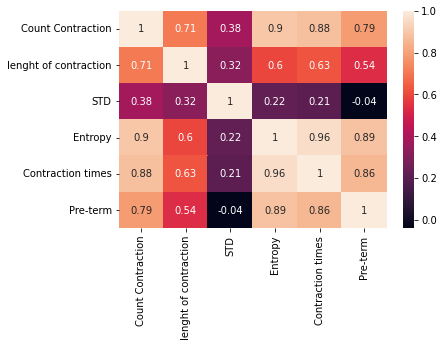

In [ ]:

correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

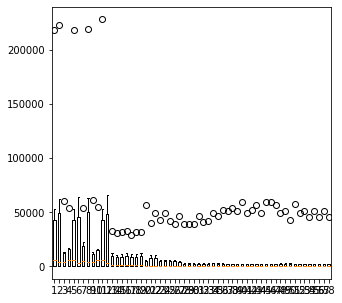

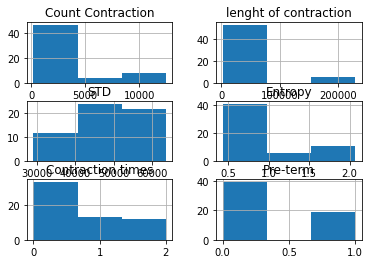

In [ ]:
fig = plt.figure(figsize =(5, 5))
plt.boxplot(df)
hist = df.hist(bins=3)
# show plot
plt.show()

In [ ]:
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<Datset normalization:

# copy the data
df_max_scaled = df.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]/df_max_scaled[column].abs().max()
      
df_max_scaled.plot(kind = 'bar')
df = df_max_scaled

In [ ]:
#----------------------------------------
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<Dataset seperation to X and Y

X = df.iloc[:, :-1].values   
Y = df.iloc[:, 5].values
#-------------------------

In [ ]:
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<KNN machine learning model
def knn(X,y):
  #Create KNN Classifier
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=1) 
  knn = KNeighborsClassifier(n_neighbors=5)

  #Train the model using the training sets
  knn.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred = knn.predict(X_test)

  print(" Knn model accuracy(in %):\n",100*metrics.accuracy_score(y_test, y_pred))



In [ ]:
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<TEST Feature selection by KNN

print()
df = shuffle(df)
comparison = []


knn(X,Y)


# Nuova sezione